In [1]:
#import the libraries
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from scipy.stats import chi2_contingency #for the chi-square test exercise!
from scipy.stats.contingency import association #for Cramér's V exercise

In [2]:
#load the DataFrame from .csv file
df_amazon = pd.read_csv("amz_uk_price_prediction_dataset.csv")

1 - Understand the relationship between product categories and their best-seller status.

In [3]:
#1. **Crosstab Analysis**: table showing the frequency of ocurrences for combinations of two categorical variables
#- Create a crosstab between the product `category` and the `isBestSeller` status.
xTab_cat_seller = pd.crosstab(df_amazon['category'], df_amazon['isBestSeller'])
xTab_cat_seller.sort_values(by='category', ascending=False)

isBestSeller,False,True
category,,
eBook Readers & Accessories,246,0
Women's Sports & Outdoor Shoes,1939,20
Women,17559,213
Window Treatments,234,5
Wind Instruments,243,7
...,...,...
Adapters,251,3
Action Cameras,1696,1
Abrasive & Finishing Products,245,5


In [4]:
#- Are there categories where being a best-seller is more prevalent?
#xTab_cat_seller.sort_values(by=True, ascending=False)
prev_ratio = xTab_cat_seller[True]/xTab_cat_seller[False]
prev_ratio.sort_values(ascending=False)
if prev_ratio.max() < 1:
    print("There are no best-seller prevalent categories in the dataframe!")
else:
     print("There are best-seller prevalent categories in this dataframe!")
#*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


There are no best-seller prevalent categories in the dataframe!


In [5]:
#2. **Statistical Tests**:
#- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#if p-value < 0.05, this suggests that there is a significant association between the categorical variables. 
#P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables.

#chi-square test for 'best-seller' and 'category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(xTab_cat_seller)
if chi2_p_value < 0.05:
    print("there is a significant association between the categorical variables")
elif chi2_p_value >= 0.05:
    print("there is not enough evidence to conclude a significant association between the variables")
else:
    print("the two categorical variables are independent!")

there is a significant association between the categorical variables


In [6]:
#- Compute Cramér's V to understand the strength of association between best-seller status and category.
#Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. 
# A higher value of Cramer's V indicates a stronger relationship between the categorical variables.
strength = association(xTab_cat_seller, method="cramer")
if strength <= 0:
    print("No association between categories")
elif strength <=1:
    print("Week association between categories")
elif strength == 1:
    print("Perfect association between categories")
else:
    print("Strong association between categories")

Week association between categories


Text(0.5, 1.0, 'Top 10 Best Seller categories')

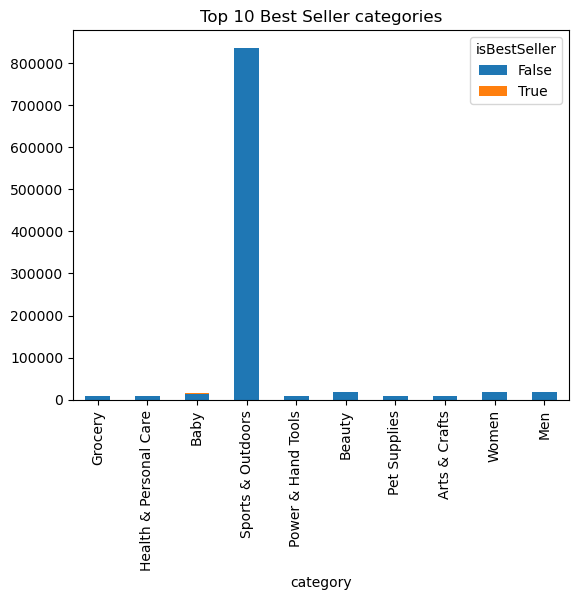

In [7]:
#3. **Visualizations**:
#- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
#xTab_cat_seller = pd.crosstab(df_amazon['category'], df_amazon['isBestSeller'])
plotTop10BestSeller = xTab_cat_seller.sort_values(by=[True, False], ascending=[False,True]).head(10)
plotTop10BestSeller.plot(kind="bar", stacked=True,)
plt.title("Top 10 Best Seller categories")

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

In [8]:
# 0. **Preliminary Step: Remove outliers in product prices.**
#For this purpose, we can use the IQR (Interquartile Range) method. 
# Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. 
# The next steps will be done with the dataframe without outliers.
#*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.**/

#first defined a new dataframe with only the price column to check the outliers
quart_price = df_amazon['price']
Q1 = quart_price.quantile(0.25)
Q3 = quart_price.quantile(0.75)
IQR = Q3 - Q1

 # Defined bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = quart_price[(quart_price < lower_bound) | (quart_price > upper_bound)]

#droping the outliers from the original dataframe. The exercise will carry on with the new dataframe
df_no_outliers = df_amazon.drop(index = outliers.index)


In [14]:
#retrieve the categories by price from the cleaned dataframe
violin_cat = df_no_outliers.groupby('category')['price'].agg('count').reset_index()

#sort the categories ascendly by price and retrieve the firts 20 
violinTop20 = violin_cat.sort_values(by='price', ascending=False).head(20)

#store only the top20 categorys in a new dataframe
vtop20=violinTop20["category"]

#prepare the datafram to be used in the violinplot chart. 
#retrieve only the categories that exist in the top20 dataframe from the cleaned dataframe;
df_violinplot = df_no_outliers[df_no_outliers["category"].isin(vtop20)]

C:\Users\ndemb\AppData\Local\Temp\ipykernel_18804\3552709062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_violinplot, palette='coolwarm')


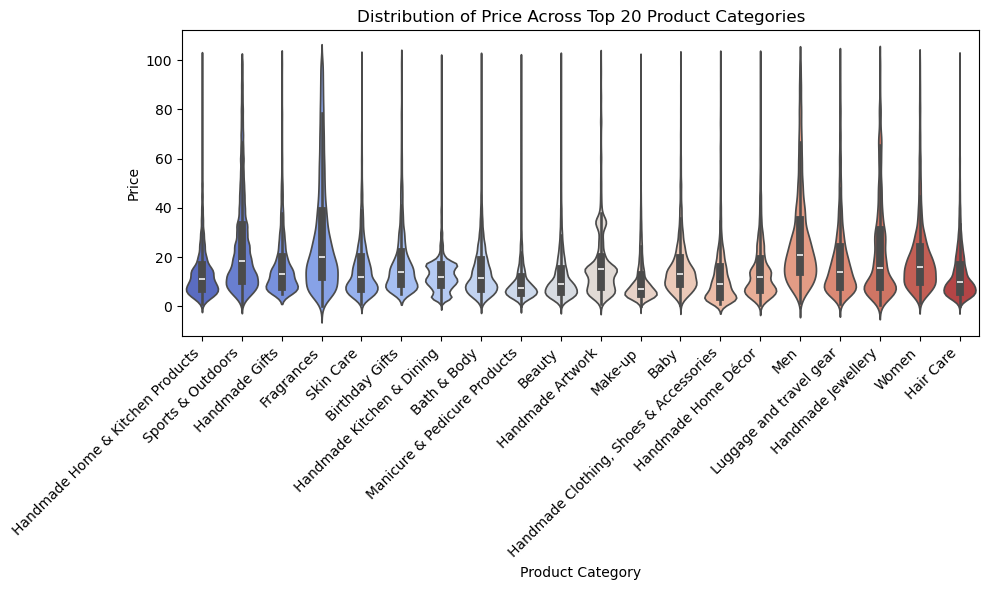

In [10]:
# 1. **Violin Plots**:
plt.figure(figsize=(10,6))
sns.violinplot(x='category', y='price', data=df_violinplot, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.tight_layout()
plt.show()

C:\Users\ndemb\AppData\Local\Temp\ipykernel_18804\3293270288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=violin_cat, palette='coolwarm')


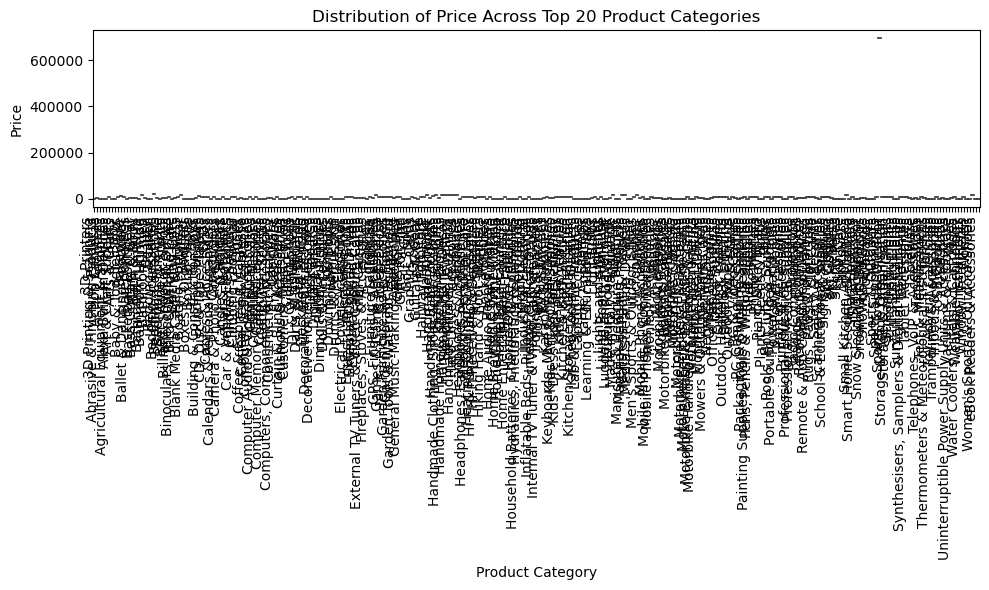

In [15]:

#- Which product category tends to have the highest median price? Don't filter here by top categories.
plt.figure(figsize=(10,6))
sns.violinplot(x='category', y='price', data=violin_cat, palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.tight_layout()
plt.show()

In [43]:
#retrieve the top 10 product categories (based on count)from the cleaned dataframe
barplot_cat = df_no_outliers.groupby('category').agg('count').reset_index()

#sort the categories descendly by price and retrieve the first 10 
barplot_cat = barplot_cat.sort_values(by='price', ascending=False).head(10)

#store only the top10 categorys in a new dataframe
barplot_cat10=barplot_cat["category"]

#prepare the datafram to be used in the violinplot chart. 
#retrieve only the categories that exist in the top20 dataframe from the cleaned dataframe;
df_barplot_cat = df_no_outliers[df_no_outliers["category"].isin(barplot_cat10)]

C:\Users\ndemb\AppData\Local\Temp\ipykernel_18804\4069160270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_barplot_cat,x='category', y='price', palette='coolwarm')


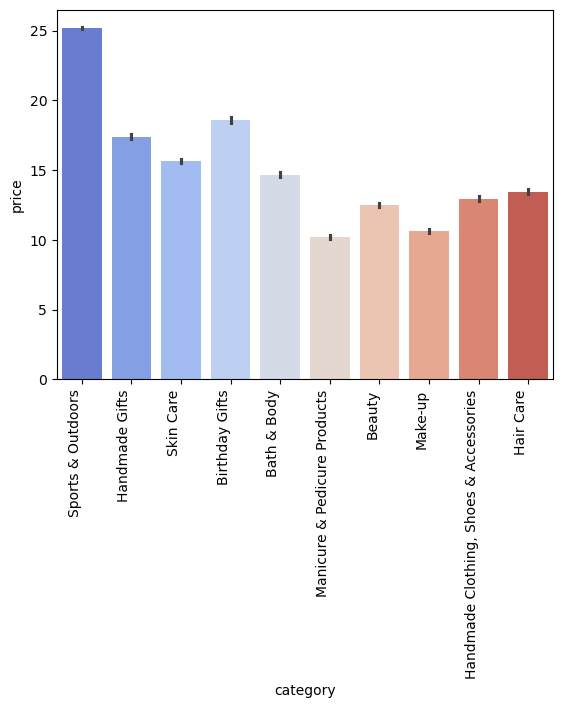

In [44]:
# 2. **Bar Charts**:
#- Create a bar chart comparing the average price of products(y) for the top 10 product categories (based on count).
sns.barplot(data=df_barplot_cat,x='category', y='price', palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.show()

C:\Users\ndemb\AppData\Local\Temp\ipykernel_18804\4142246942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_no_outliers,x='category', y='price', palette='coolwarm')


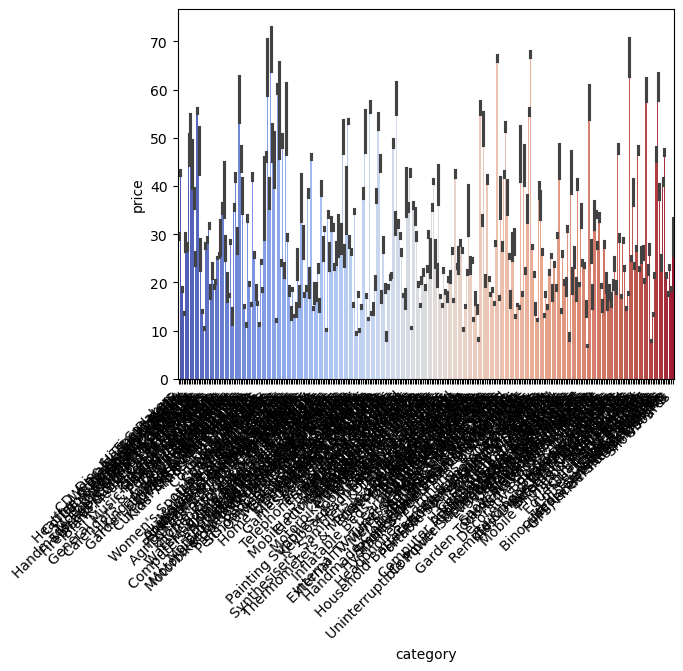

In [48]:
#- Create a bar chart that shows the higher average price categorie (based on count).
sns.barplot(data=df_no_outliers,x='category', y='price', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\ndemb\AppData\Local\Temp\ipykernel_18804\3621875236.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='category', y='stars', data=df_violinplot, palette='coolwarm')


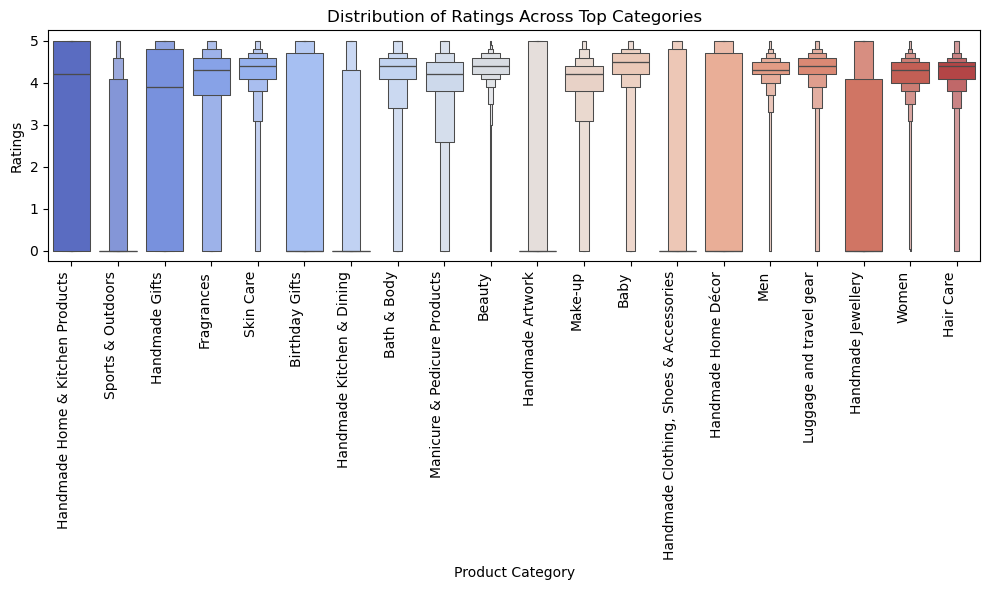

In [54]:
# 3. **Box Plots**:
#- Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. 

plt.figure(figsize=(10,6))
sns.boxenplot(x='category', y='stars', data=df_violinplot, palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings Across Top Categories')
plt.tight_layout()
plt.show()


#- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

In [55]:
# 1. **Correlation Coefficients**:
#- Calculate the correlation coefficient between `price` and `stars`.

#Pearson correlation
pr_correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
pr_correlation

#Spearman correlation
sp_correlation = df_no_outliers['price'].corr(df_no_outliers['stars'], method='spearman')
sp_correlation

print(f"Pearson correlation is {pr_correlation}")
print(f"Spearman correlation is {sp_correlation}")


Pearson correlation is -0.0776729987818137
Spearman correlation is -0.06679697280768314


In [ ]:

#- Is there a significant correlation between product price and its rating?
#the values observed suggests a week correlation between the variables.

<Axes: xlabel='stars', ylabel='price'>

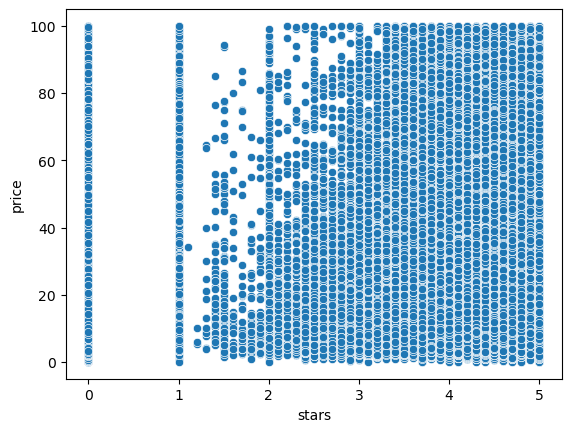

In [62]:
# 2. **Visualizations**:
#- Use a scatter plot to visualize the relationship between product rating and price. 
# Plotting a scatter plot to visualize the relationship between 'stars' and 'price'
sns.scatterplot(data=df_barplot_cat, x='stars', y='price')


In [ ]:
#What patterns can you observe?
#We cannot visualize a pattern!

In [ ]:
#- Use a correlation heatmap to visualize correlations between all numerical variables.
# Plotting a heatmap for the 'crosstab_result' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers

#- Examine if product prices typically follow a normal distribution using a QQ plot.